<a href="https://colab.research.google.com/github/sifat173/Face-expression-recognition/blob/main/Face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!cp "/content/gdrive/MyDrive/data.zip" "/content/"



In [ ]:
#!unzip -q "/content/data.zip" -d "/content/data"



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

# Define constants
img_width = 48
img_height = 48
batch_size = 128
epochs = 50
train_data_dir = '/content/images/images/train'
test_data_dir = '/content/images/images/validation'


In [ ]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')
 
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/50
226/226 [==============================] - 29s 118ms/step - loss: 1.7956 - accuracy: 0.2577 - val_loss: 1.6705 - val_accuracy: 0.3467
Epoch 2/50
226/226 [==============================] - 27s 118ms/step - loss: 1.5958 - accuracy: 0.3719 - val_loss: 1.4111 - val_accuracy: 0.4526
Epoch 3/50
226/226 [==============================] - 27s 118ms/step - loss: 1.4297 - accuracy: 0.4495 - val_loss: 1.2790 - val_accuracy: 0.5109
Epoch 4/50
226/226 [==============================] - 26s 117ms/step - loss: 1.3473 - accuracy: 0.4849 - val_loss: 1.2243 - val_accuracy: 0.5361
Epoch 5/50
226/226 [==============================] - 26s 116ms/step - loss: 1.2946 - accuracy: 0.5048 - val_loss: 1.1728 - val_accuracy: 0.5492
Epoch 6/50
226/226 [==============================] - 28s 124ms/step - loss: 1.2588 - accuracy: 0.5202 - val_loss: 1.1397 - val_accuracy: 0.5637
Epoch 7/50
226/226 [=========================

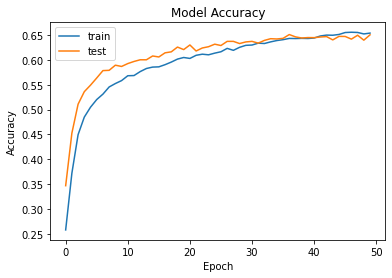

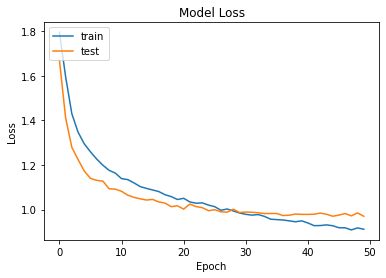

In [ ]:



# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')
 
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=test_generator)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
